## Parte I: Analizando la Base

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
EPH2024 = pd.read_excel('usu_individual_T124.xlsx')
EPH2004 = pd.read_stata("Individual_t104.dta")

#### 2a) Eliminen todas las observaciones que no corresponden a los aglomerados de Ciudad Autónoma de Buenos Aires o Gran Buenos Aires, y unan ambos trimestres en una sola base

In [5]:
EPH2004.columns = EPH2004.columns.str.lower()
EPH2024.columns = EPH2024.columns.str.lower()

EPH2024BS=EPH2024[(EPH2024["aglomerado"] == 32) | (EPH2024["aglomerado"] == 33)]
EPH2004BS=EPH2004[(EPH2004["aglomerado"] == "Ciudad de Buenos Aires") | (EPH2004["aglomerado"] == "Partidos del GBA")]

##### Mapeo para igualar la codificación

In [7]:
#region Mapeo
mapeo = {
    'Sí': "1",
    'No': "2",
}

mapeo2 = {
    "Ciudad de Buenos Aires" : "32",
    'Partidos del GBA': "33",
}

mapeo_parentesco = {
    'Jefe': '1',
    'Cónyuge/Pareja': '2',
    'Hijo/Hijastro': '3',
    'Yerno/Nuera': '4',
    'Nieto': '5',
    'Madre/Padre': '6',
    'Suegro': '7',
    'Hermano': '8',
    'Otros Familiares': '9',
    'No Familiares': '10'
}

mapeo_estatus = {
    'Jubilado/pensionado': 1,
    'Rentista': 2,
    'Estudiante': 3,
    'Ama de casa': 4,
    'Menor de 6 años': 5,
    'Discapacitado': 6,
    'Otros': 7
}

mapeo_cat_ocu = {
    'Patrón': 1,
    'Cuenta propia': 2,
    'Obrero o empleado': 3,
    'Trabajador familiar sin remuneración': 4,
    'Ns./Nr.': 9
}

mapeo_sexo= {
    'Varón': '1',
    'Mujer': '2',
}

mapeo_estado_civil = {
    'Unido': 1,
    'Casado': 2,
    'Separado o Divorciado': 3,
    'Viudo': 4,
    'Soltero': 5
}

mapeo_cobertura_medica = {
    'Obra social (incluye PAMI)': 1,
    'Mutual/Prepaga/Servicio de emergencia': 2,
    'Planes y seguros públicos': 3,
    'No paga ni le descuentan': 4,
    'Ns./Nr.' : 9,
    'Obra social y mutual/prepaga/servicio de emergencia': 12,
    'Obra social y planes y seguros públicos': 13,
    'Mutual/prepaga/servicio de emergencia/planes y seguros públicos': 23,
    'Obra social, mutual/prepaga/servicio de emergencia y planes y seguros públicos': 123
}

mapeo_leer= {
    'Sí': 1,
    'No': 2,
    "Menor de 2 años": 3,
    "Ns./Nr.": 0
}

mapeo_edu= {
    'Sí, asiste': '1',
    'No asiste, pero asistió': '2',
    "Nunca asistió": "3",
    "Ns./Nr.": "9"
}

mapeo_edu2= {
    'Público': '1',
    'Privado': '2',
    "Ns./Nr.": "9"
}

mapeo_establecimiento = {
    'Jardín/Preescolar': '1',
    'Primario': '2',
    'EGB': '3',
    'Secundario': '4',
    'Polimodal': '5',
    'Terciario': '6',
    'Universitario': '7',
    'Posgrado Universitario': '8',
    'Educación especial (discapacitado)': '9',
    'Ns./Nr.': '0',
}

mapeo_edu3= {
    'Sí': '1',
    'No': '2',
    "Ns./Nr.": "9"
}


mapeo_lugar = {
    'En esta localidad': '1',
    'En otra localidad': '2',
    'En otra provincia (especificar)': '3',
    'En un país limítrofe': '4',
    'En otro país': '5',
    'No había nacido': '6',
    'Ns./Nr.': '9',
}

mapeo_nivel_educativo = {
    'Primaria Incompleta (incluye educación especial)': 1,
    'Primaria Completa': 2,
    'Secundaria Incompleta': 3,
    'Secundaria Completa': 4,
    'Superior Universitaria Incompleta': 5,
    'Superior Universitaria Completa': 6,
    'Sin instrucción': 7,
    'Ns./ Nr.': 9
}

mapeo_cond_actividad = {
    'Entrevista individual no realizada (no respuesta al cuestion': 0,
    'Ocupado': 1,
    'Desocupado': 2,
    'Inactivo': 3,
    'Menor de 10 años': 4,
}

mapeo_m500 = {
    'N': 1,
    'S': 2,
}

#endregion

In [9]:
#region Mapeo2
EPH2004BS["aglomerado"] = EPH2004BS["aglomerado"].map(mapeo2)
EPH2004BS["h15"] = EPH2004BS["h15"].map(mapeo)
EPH2004BS["ch03"] = EPH2004BS["ch03"].map(mapeo_parentesco)
EPH2004BS["cat_inac"] = EPH2004BS["cat_inac"].map(mapeo_estatus)
EPH2004BS["cat_ocup"] = EPH2004BS["cat_ocup"].map(mapeo_cat_ocu)
EPH2004BS["ch04"] = EPH2004BS["ch04"].map(mapeo_sexo)
EPH2004BS["ch07"] = EPH2004BS["ch07"].map(mapeo_estado_civil)
EPH2004BS["ch08"] = EPH2004BS["ch08"].map(mapeo_cobertura_medica)
EPH2004BS["ch09"] = EPH2004BS["ch09"].map(mapeo_leer)
EPH2004BS["ch10"] = EPH2004BS["ch10"].map(mapeo_edu)
EPH2004BS["ch11"] = EPH2004BS["ch11"].map(mapeo_edu2)
EPH2004BS["ch12"] = EPH2004BS["ch12"].map(mapeo_establecimiento)
EPH2004BS["ch13"] = EPH2004BS["ch13"].map(mapeo_edu3)
EPH2004BS["ch15"] = EPH2004BS["ch15"].map(mapeo_lugar)
EPH2004BS["ch16"] = EPH2004BS["ch16"].map(mapeo_lugar)
EPH2004BS["nivel_ed"] = EPH2004BS["nivel_ed"].map(mapeo_nivel_educativo)
EPH2004BS["estado"] = EPH2004BS["estado"].map(mapeo_cond_actividad)

EPH2004BS["trimestre"] = 1
EPH2004BS["region"] = 1
#endregion

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3343321540.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2004BS["aglomerado"] = EPH2004BS["aglomerado"].map(mapeo2)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3343321540.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EPH2004BS["h15"] = EPH2004BS["h15"].map(mapeo)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3343321540.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

#### Unión

In [15]:
EPH_completo= pd.concat([EPH2004BS, EPH2024BS], ignore_index=True)

#### 2b) Si hay observaciones con valores que no tienen sentido, descártenlas (por ejemplo, ingresos y edades negativos). Expliquen las decisiones tomadas

In [17]:
#Decartamos las columnas que no se encuentran en ambas bases de datos
columnas_2004 = set(EPH2004BS.columns)
columnas_2024 = set(EPH2024BS.columns)

# Calcular las columnas que no se comparten
columnas_diferentes2004 = columnas_2004 - columnas_2024
columnas_diferentes2024 = columnas_2024 - columnas_2004

# Mostrar los resultados
print("Columnas que no están en EPH2024:", columnas_diferentes2004)
print("Columnas que no están en EPH2004:", columnas_diferentes2024)

#Descartamos las columnas
columnas_descartar = columnas_diferentes2004 | columnas_diferentes2024
EPH_completo.drop(columnas_descartar, axis=1, inplace=True)

Columnas que no están en EPH2024: {'idimpp', 'pj1_1', 'pj3_1', 'pj2_1'}
Columnas que no están en EPH2004: {'imputa', 'pondii', 'pondih', 'ch05', 'pondiio'}


In [19]:
#Descartamos todas las columnas que, debido a pertenecer a los aglemerados 32 y 33 
#su valor no varía y aquellas que no son de interes
EPH_completo.drop(["trimestre", "region","mas_500", "codusu", "nro_hogar"], axis=1, inplace=True)

In [21]:
# Filtrar columnas que tienen al menos un NaN

columns_with_nan = EPH_completo.columns[EPH_completo.isna().any()].tolist()

# Crear un nuevo DataFrame solo con las columnas que tienen NaN
df_nan_columns = EPH_completo[columns_with_nan]

# Contar NaN en cada columna y convertir a DataFrame
nan_counts = EPH_completo[columns_with_nan].isna().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

print("\nDataFrame con columnas que contienen al menos un NaN y su cantidad:")
nan_counts


DataFrame con columnas que contienen al menos un NaN y su cantidad:


,Column,NaN Count
0,h15,1230
1,ch03,144
2,ch07,338
3,ch08,4
4,ch10,264
...,...,...
108,pdecindr,7051
109,idecifr,7051
110,pdecifr,7051
111,ideccfr,7051


In [23]:
descartar = []
for i in nan_counts[nan_counts["NaN Count"] == 7051]["Column"]:
    print(EPH_completo[i].value_counts())
    print(i)
    descartar.append(i)

#Todas estas columnas estan compuestas por Nan o por valores nulos. 
#Descarto todas

EPH_completo.drop(descartar, axis=1, inplace=True)

pp09c_esp
    7647
Name: count, dtype: int64
pp09c_esp
idecocur
    7647
Name: count, dtype: int64
idecocur
pdecocur
    7647
Name: count, dtype: int64
pdecocur
idecindr
    7647
Name: count, dtype: int64
idecindr
pdecindr
    7647
Name: count, dtype: int64
pdecindr
idecifr
    7647
Name: count, dtype: int64
idecifr
pdecifr
    7647
Name: count, dtype: int64
pdecifr
ideccfr
    7647
Name: count, dtype: int64
ideccfr
pdeccfr
    7647
Name: count, dtype: int64
pdeccfr


In [27]:
# Crear una máscara booleana para valores negativos
negative_mask = EPH_completo["t_vi"].lt(0)

negative_count = negative_mask.sum()

print("Número de valores negativos:")
print(negative_count)


Número de valores negativos:
346


In [29]:
ing_no_laborales = ["v2_m","v3_m","v4_m","v5_m","v8_m","v9_m","v10_m","v11_m","v12_m","v18_m","v19_am","v21_m","t_vi"]

for i in ing_no_laborales:
    negative_mask = EPH_completo[i].lt(0)

    negative_count = negative_mask.sum()

    print("Número de valores negativos en:" + i + ": ")
    print(negative_count)
    EPH_completo[i] = EPH_completo[EPH_completo[i] >= 0][i]


Número de valores negativos en:v2_m: 
174
Número de valores negativos en:v3_m: 
2
Número de valores negativos en:v4_m: 
0
Número de valores negativos en:v5_m: 
42
Número de valores negativos en:v8_m: 
18
Número de valores negativos en:v9_m: 
3
Número de valores negativos en:v10_m: 
40
Número de valores negativos en:v11_m: 
14
Número de valores negativos en:v12_m: 
52
Número de valores negativos en:v18_m: 
2
Número de valores negativos en:v19_am: 
0
Número de valores negativos en:v21_m: 
73
Número de valores negativos en:t_vi: 
346


In [31]:
EPH_completo["p47t"] = EPH_completo[EPH_completo["p47t"] >= 0]["p47t"] 
EPH_completo["p21"] = EPH_completo[EPH_completo["p21"] >= 0]["p21"] 
EPH_completo["tot_p12"] = EPH_completo[EPH_completo["tot_p12"] >= 0]["tot_p12"] 

In [33]:
EPH_completo["ch06"] = pd.to_numeric(EPH_completo['ch06'], errors='coerce')
EPH_completo["ch06"] = EPH_completo[EPH_completo["ch06"] > 0]["ch06"] 

# Eliminar filas con NaN en 'columna1'
EPH_completo = EPH_completo.dropna(subset=['ch06'])

# Restablecer el índice (opcional)
EPH_completo.reset_index(drop=True, inplace=True)

print(EPH_completo)

      componente h15    ano4 aglomerado  pondera ch03 ch04  ch06  ch07  ch08  \
0            1.0   1  2004.0         32   1299.0    1    1  79.0   4.0   1.0   
1            1.0   1  2004.0         32   2018.0    1    2  67.0   NaN   4.0   
2            1.0   1  2004.0         32   1486.0    1    2  74.0   4.0   1.0   
3            1.0   1  2004.0         32   1674.0    1    1  54.0   2.0   2.0   
4            2.0   1  2004.0         32   1674.0    2    2  51.0   2.0   2.0   
...          ...  ..     ...        ...      ...  ...  ...   ...   ...   ...   
14507          1   1  2024.0         33   3410.0    1    2  43.0   3.0   1.0   
14508          2   2  2024.0         33   3410.0    3    1  21.0   5.0   1.0   
14509          3   2  2024.0         33   3410.0    3    1  20.0   5.0   1.0   
14510          4   2  2024.0         33   3410.0    3    1  11.0   5.0   1.0   
14511          5   2  2024.0         33   3410.0    3    2  24.0   5.0   1.0   

       ...     itf decifr rdecifr gdeci

In [37]:
#Inflación de Feb 2004 a Feb 2024 (https://calculadoradeinflacion.com) = 55.959,57%
EPH_completo.loc[EPH_completo['ano4'] == 2004, 'ipcf'] *= 560.5957


#### 2c) Una vez hecha esa limpieza, realicen un gráfico de barras mostrando la composición por sexo para 2004 y 2024. Comenten los resultados

ch04  Mujer  Varón
ano4              
2004   3984   3528
2024   3651   3349


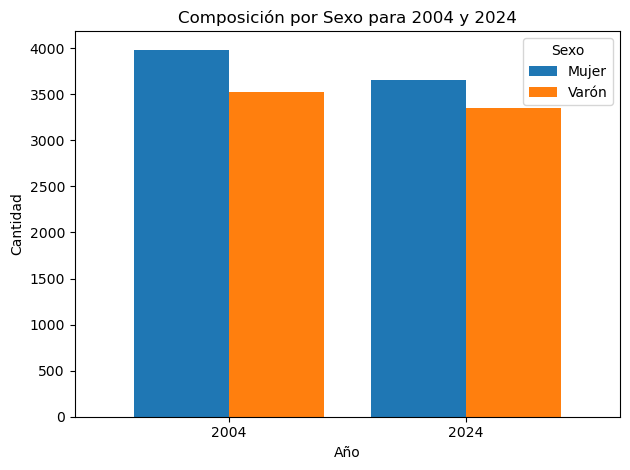

In [39]:
# Contar la cantidad de casos por sexo y año

EPH_completo["ch04"] = EPH_completo["ch04"].astype(int)
EPH_completo["ano4"] = EPH_completo["ano4"].astype(int)
EPH_completo["ch04"]
EPH_completo3 = EPH_completo
EPH_completo3["ch04"] = EPH_completo3["ch04"].map({1: 'Varón', 2: 'Mujer'})

conteo = EPH_completo.groupby(['ano4', 'ch04']).size().unstack(fill_value=0)
print(conteo)
# Configuración para el gráfico
conteo.plot(kind='bar', width=0.8)

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Composición por Sexo para 2004 y 2024')
plt.xticks(rotation=0)
plt.legend(title='Sexo', )

# Mostrar el gráfico
plt.tight_layout()
plt.show()

ch04      Mujer      Varón
ano4                      
2004  53.035144  46.964856
2024  52.157143  47.842857


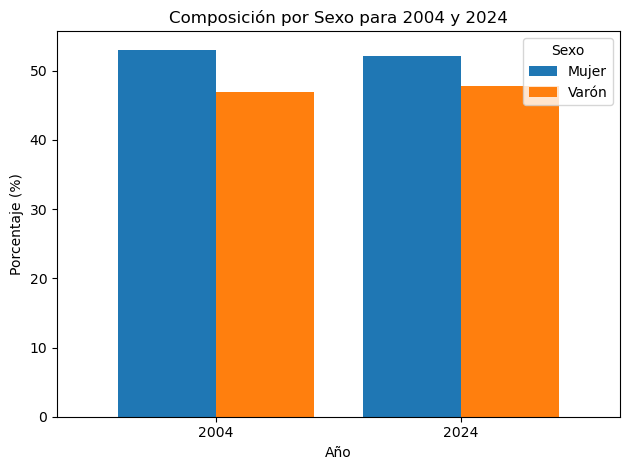

In [41]:
# Calcular el porcentaje
porcentaje = conteo.div(conteo.sum(axis=1), axis=0) * 100
print(porcentaje)
# Configuración para el gráfico
porcentaje.plot(kind='bar', width=0.8)

# Configuración de etiquetas y título
plt.xlabel('Año')
plt.ylabel('Porcentaje (%)')
plt.title('Composición por Sexo para 2004 y 2024')
plt.xticks(rotation=0)
plt.legend(title='Sexo')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### 2d) Realicen una matriz de correlación para 2004 y 2024 con las siguientes variables: CH04, CH06, CH07, CH08, NIVEL ED, ESTADO, CAT_INAC, IPCF.

In [43]:
EPH_completo["ch04"] = EPH_completo["ch04"].map({'Varón': 1, "Mujer": 2})
EPH_completo["ch04"] = EPH_completo["ch04"].astype('category')

EPH_completo["ch07"] = EPH_completo["ch07"].astype('category')
EPH_completo["nivel_ed"] = EPH_completo["nivel_ed"].astype('category')
EPH_completo["ch08"] = EPH_completo["ch08"].astype('category')
EPH_completo["estado"] = EPH_completo["estado"].astype('category')
EPH_completo["cat_inac"] = EPH_completo["cat_inac"].astype('category')



###### V1

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\396116515.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummies["pareja_actual"] = np.where((df_dummies['ch07'] == 1) | (df_dummies['ch07'] == 2), 1, 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\396116515.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_dummies["tiene/busca_trabajo"] = np.where((df_dummies['estado'] == 1) | (df_dummies['estado'] == 2), 1, 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\396116515.py:6: PerformanceWarning: DataFrame is h

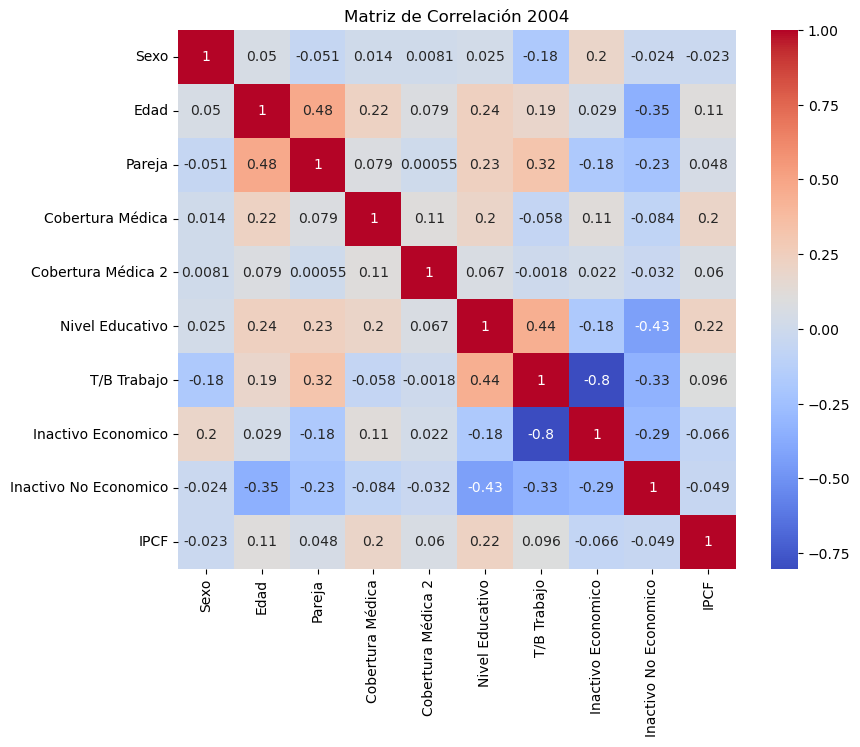

In [45]:
# Convertir variables categóricas a dummies
df_dummies = EPH_completo

df_dummies["pareja_actual"] = np.where((df_dummies['ch07'] == 1) | (df_dummies['ch07'] == 2), 1, 0)
df_dummies["tiene/busca_trabajo"] = np.where((df_dummies['estado'] == 1) | (df_dummies['estado'] == 2), 1, 0)
df_dummies["cobertura_m"] = np.where(df_dummies['ch08'] == 4, 0, 1)
df_dummies["cobertura_m2"] = np.where((df_dummies['ch08'] == 12) | (df_dummies['ch08'] == 13)| (df_dummies['ch08'] == 23) | (df_dummies['ch08'] == 123), 1, 0)

#df_dummies["instruido"] = np.where(df_dummies['nivel_ed'] == 7, 0, 1)
df_dummies['nivel_ed_or'] = df_dummies['nivel_ed'].astype(int)

df_dummies.loc[df_dummies['nivel_ed_or'] == 7, 'nivel_ed_or'] = 0

df_dummies['nivel_ed_or'] = df_dummies['nivel_ed_or'].astype("category")


df_dummies.loc[df_dummies['cat_inac'].isna(), 'cat_inac'] = 0
df_dummies["inac_eco"] = np.where((df_dummies['cat_inac'] == 1) | (df_dummies['cat_inac'] == 2) | (df_dummies['cat_inac'] == 3) | (df_dummies['cat_inac'] == 4), 1, 0)
df_dummies["inac_neco"] = np.where((df_dummies['cat_inac'] == 5) | (df_dummies['cat_inac'] == 6) | (df_dummies['cat_inac'] == 7), 1, 0)


variables_interes = ['ch04', 'ch06', 'pareja_actual', 'cobertura_m', "cobertura_m2" , 'nivel_ed_or', 'tiene/busca_trabajo', 'inac_eco', "inac_neco", 'ipcf']

titulos_interes = ['Sexo', 'Edad', 'Pareja', 'Cobertura Médica', "Cobertura Médica 2" , 'Nivel Educativo', 'T/B Trabajo', 'Inactivo Economico', "Inactivo No Economico", 'IPCF']

# Calcular la matriz de correlación para 2004 y 2024
corr_2004 = df_dummies[df_dummies["ano4"] == 2004][variables_interes].corr()
#corr_2024 = data_2024_filtrado[variables_interes].corr()


# Visualizar las matrices de correlación
plt.figure(figsize=(9, 7)) 

sns.heatmap(corr_2004, annot=True, cmap='coolwarm', xticklabels=titulos_interes, yticklabels=titulos_interes)
plt.title('Matriz de Correlación 2004')
plt.show()

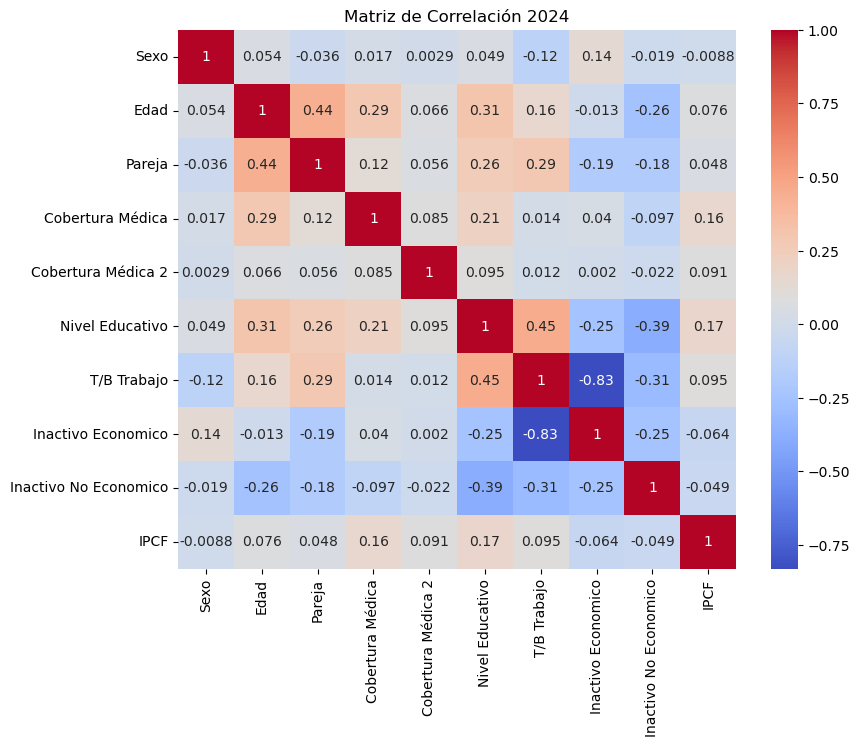

In [47]:

variables_interes = ['ch04', 'ch06', 'pareja_actual', 'cobertura_m', "cobertura_m2" , 'nivel_ed_or', 'tiene/busca_trabajo', 'inac_eco', "inac_neco", 'ipcf']

titulos_interes = ['Sexo', 'Edad', 'Pareja', 'Cobertura Médica', "Cobertura Médica 2" , 'Nivel Educativo', 'T/B Trabajo', 'Inactivo Economico', "Inactivo No Economico", 'IPCF']

# Calcular la matriz de correlación para 2004 y 2024
corr_2024 = df_dummies[df_dummies["ano4"] == 2024][variables_interes].corr()
#corr_2024 = data_2024_filtrado[variables_interes].corr()

corr_2024
# Visualizar las matrices de correlación
plt.figure(figsize=(9, 7)) 
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', xticklabels=titulos_interes, yticklabels=titulos_interes)
plt.title('Matriz de Correlación 2024')
plt.show()

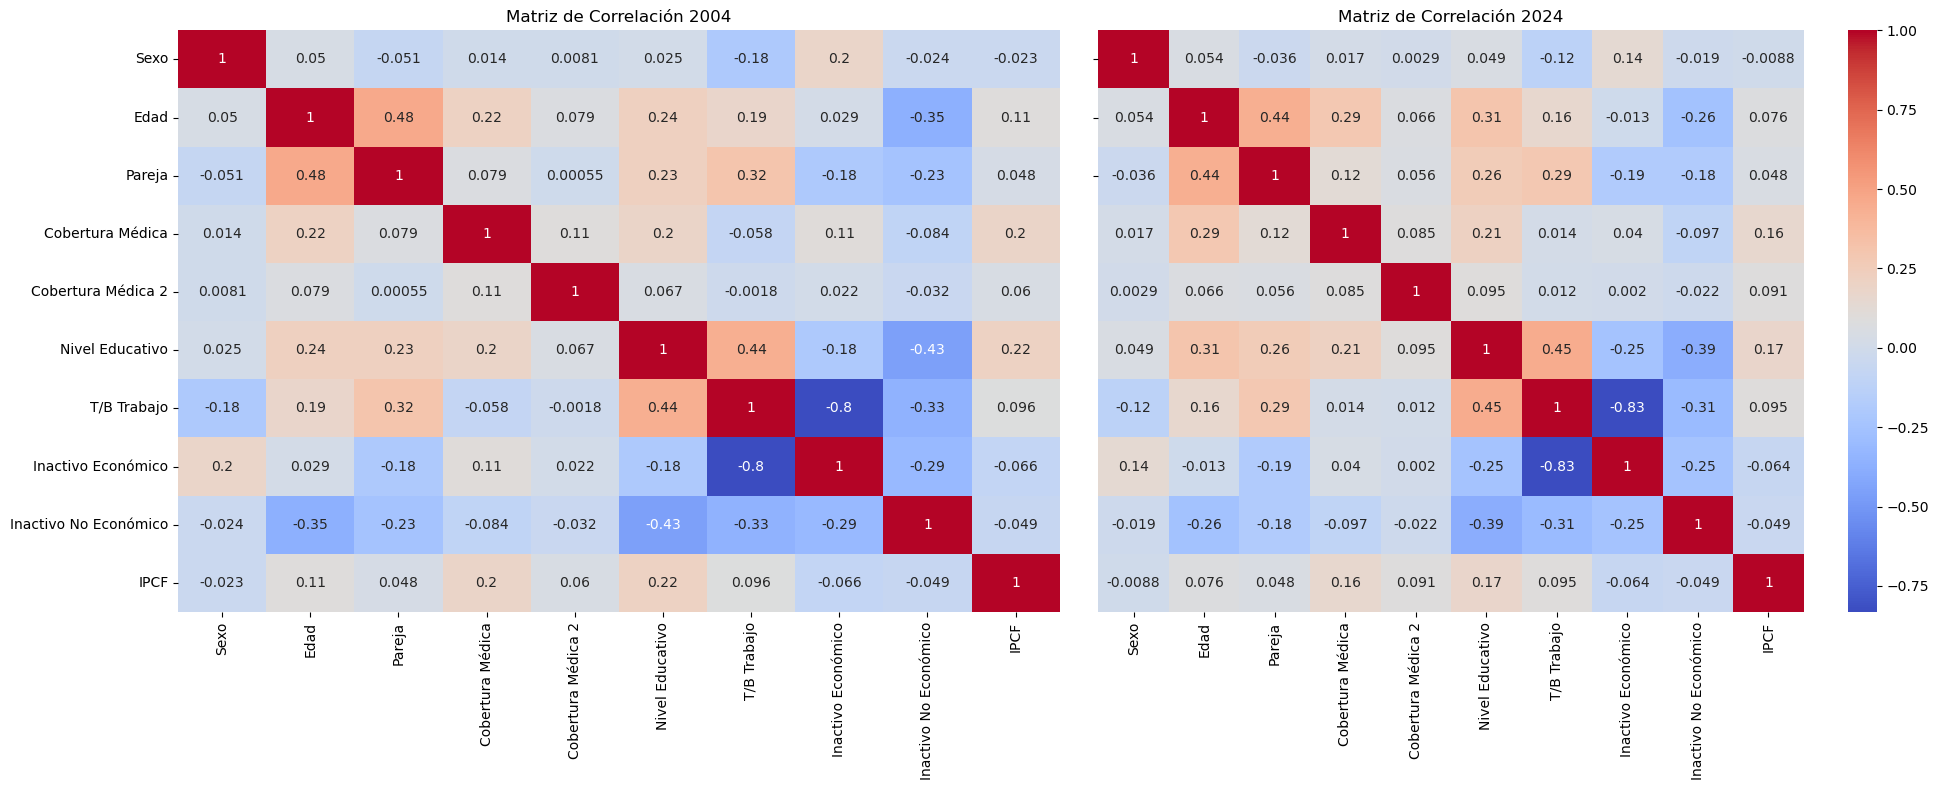

In [49]:

# Supongamos que df_dummies es tu DataFrame ya definido.

# Definir las variables de interés y sus títulos
variables_interes = ['ch04', 'ch06', 'pareja_actual', 'cobertura_m', 'cobertura_m2', 
                     'nivel_ed_or', 'tiene/busca_trabajo', 'inac_eco', 'inac_neco', 'ipcf']

titulos_interes = ['Sexo', 'Edad', 'Pareja', 'Cobertura Médica', 'Cobertura Médica 2', 
                   'Nivel Educativo', 'T/B Trabajo', 'Inactivo Económico', 'Inactivo No Económico', 'IPCF']

# Calcular la matriz de correlación para 2024
corr_2024 = df_dummies[df_dummies["ano4"] == 2024][variables_interes].corr()

# Calcular la matriz de correlación para 2004
corr_2004 = df_dummies[df_dummies["ano4"] == 2004][variables_interes].corr()

# Crear un gráfico con dos subgráficas
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Heatmap para la matriz de correlación de 2024
sns.heatmap(corr_2024, annot=True, cmap='coolwarm', ax=axes[1], 
            xticklabels=titulos_interes, yticklabels="   ", cbar=True)
axes[1].set_title('Matriz de Correlación 2024')

# Heatmap para la matriz de correlación de 2004
sns.heatmap(corr_2004, annot=True, cmap='coolwarm', ax=axes[0], 
            xticklabels=titulos_interes, yticklabels=titulos_interes, cbar=False)
axes[0].set_title('Matriz de Correlación 2004')
axes[0].tick_params(axis='y', bottom=False)  # Ocultar el eje x

# Ajustar el diseño
plt.tight_layout()
plt.show()



#### 2e) ¿Cuántos desocupados hay en la muestra? ¿Cuántos inactivos? ¿Cuál es la media de ingreso per cápita familiar (IPCF) según estado (ocupado, desocupado, inactivo)?

In [51]:
#hacerlo por año
# Contar el número de desocupados e inactivos

EPH_completo["estado"] = EPH_completo["estado"].astype("int")

ocupados = EPH_completo[EPH_completo['estado'] == 1].shape[0]
ocupados04 = EPH_completo[(EPH_completo['estado'] == 1) & (EPH_completo['ano4'] == 2004)].shape[0]
ocupados24 = EPH_completo[(EPH_completo['estado'] == 1) & (EPH_completo['ano4'] == 2024)].shape[0]

desocupados = EPH_completo[EPH_completo['estado'] == 2].shape[0]
desocupados04 = EPH_completo[(EPH_completo['estado'] == 2) & (EPH_completo['ano4'] == 2004)].shape[0]
desocupados24 = EPH_completo[(EPH_completo['estado'] == 2) & (EPH_completo['ano4'] == 2024)].shape[0]

inactivos = EPH_completo[EPH_completo['estado'] == 3].shape[0]
inactivos04 = EPH_completo[(EPH_completo['estado'] == 3) & (EPH_completo['ano4'] == 2004)].shape[0]
inactivos24 = EPH_completo[(EPH_completo['estado'] == 3) & (EPH_completo['ano4'] == 2024)].shape[0]

# Calcular la media de ingreso per cápita familiar según estado
media_ipcf = EPH_completo[(EPH_completo["estado"] > 0) & (EPH_completo["estado"] < 4)].groupby('estado')['ipcf'].mean().reset_index()

# Imprimir los resultados
print(f'Número de ocupados: {ocupados}')
print(f'Número de ocupados 2004: {ocupados04}')
print(f'Número de ocupados 2024: {ocupados24}')

print(f'Número de desocupados: {desocupados}')
print(f'Número de desocupados 2004: {desocupados04}')
print(f'Número de desocupados 2024: {desocupados24}')

print(f'Número de inactivos: {inactivos}')
print(f'Número de inactivos 2004: {inactivos04}')
print(f'Número de inactivos 2024: {inactivos24}')
print('Media de ingreso per cápita familiar según estado:')
print(media_ipcf)

Número de ocupados: 6302
Número de ocupados 2004: 3078
Número de ocupados 2024: 3224
Número de desocupados: 839
Número de desocupados 2004: 528
Número de desocupados 2024: 311
Número de inactivos: 5459
Número de inactivos 2004: 2797
Número de inactivos 2024: 2662
Media de ingreso per cápita familiar según estado:
   estado          ipcf
0       1  7.317534e+07
1       2  4.437900e+07
2       3  5.094078e+07


C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\47407585.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='estado', y='ipcf', data=media_ipcf, palette='viridis')


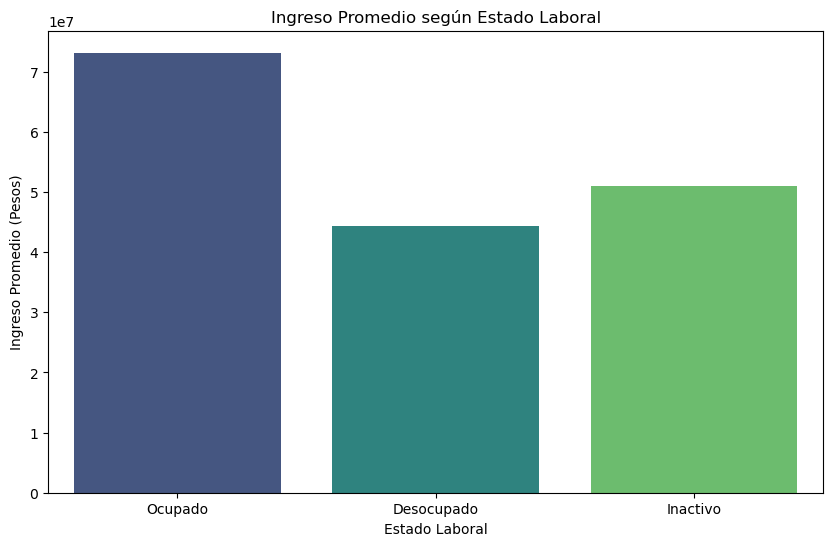

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='estado', y='ipcf', data=media_ipcf, palette='viridis')

# Ajustar título y etiquetas
plt.title('Ingreso Promedio según Estado Laboral')
plt.xlabel('Estado Laboral')
plt.ylabel('Ingreso Promedio (Pesos)')
# Cambiar las etiquetas del eje x
nuevas_etiquetas = ['Ocupado', 'Desocupado', 'Inactivo']
plt.xticks(ticks=range(len(nuevas_etiquetas)), labels=nuevas_etiquetas)
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para mejor legibilidad
plt.show()

#### 3) Uno de los grandes problemas de la EPH es la creciente cantidad de hogares que no reportan sus ingresos (ver por ejemplo el siguiente informe). ¿Cuántas personas no respondieron cuál es su condición de actividad? Guarden como una base distinta llamada respondieron las observaciones donde respondieron la pregunta sobre su condición de actividad (ESTADO). Las observaciones con ESTADO=0 guárdenlas en una base bajo el nombre norespondieron.

In [55]:
#aca es general 2004 y 2024, no esta separado por año

# Filtrar las observaciones donde respondieron su condición de actividad (ESTADO ≠ 0)
respondieron = df_dummies[df_dummies['estado'] != 0]

# Filtrar las observaciones donde NO respondieron su condición de actividad (ESTADO = 0)
norespondieron = df_dummies[df_dummies['estado'] == 0]

# Guardar la cantidad de personas que no respondieron su condición de actividad
cantidad_norespondieron = norespondieron.shape[0]
cantidad_respondieron = respondieron.shape[0]

# Mostrar los resultados
print(f"Cantidad de personas que NO respondieron su condición de actividad: {cantidad_norespondieron}")
print(f"Cantidad de personas que respondieron su condición de actividad: {cantidad_respondieron}")

# Guardar las bases en archivos separados
respondieron.to_csv('respondieron.csv', index=False)
norespondieron.to_csv('norespondieron.csv', index=False)

Cantidad de personas que NO respondieron su condición de actividad: 51
Cantidad de personas que respondieron su condición de actividad: 14461


#### 4)Agreguen a la base respondieron una columna llamada PEA (Población Económicamente Activa) que tome 1 si están ocupados o desocupados en ESTADO. Realicen un gráfico de barras mostrando la composición por PEA para 2004 y 2024. Comenten los resultados.¶

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3770805843.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3770805843.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3770805843.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

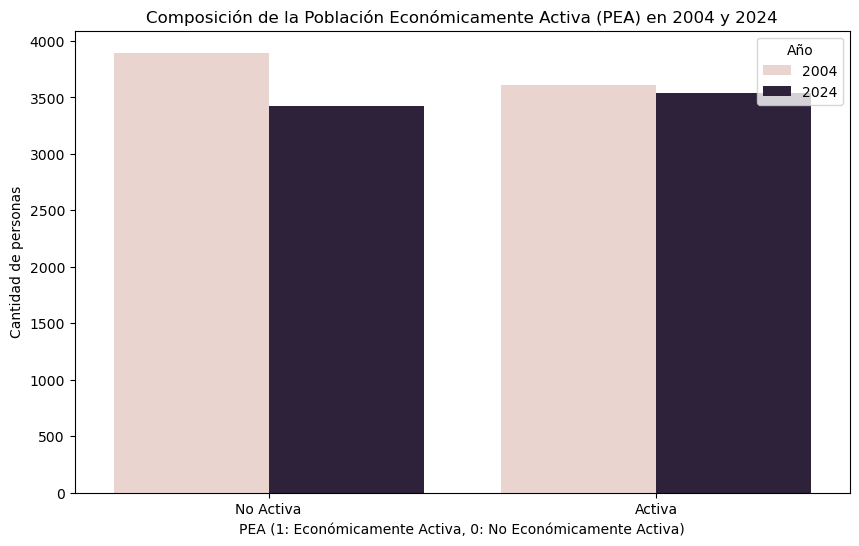

In [57]:
# Agregar la columna 'PEA' (1 si ocupados o desocupados, 0 si inactivos)
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

# Gráfico de barras mostrando la composición por PEA para 2004 y 2024
# Añadir una columna 'año' para distinguir entre los dos años
respondieron['ano4'] =respondieron['ano4'].astype(int)# Suponiendo que 'ANO4' contiene el año de la observación

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.countplot(x='PEA', hue='ano4', data=respondieron)
plt.title('Composición de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('PEA (1: Económicamente Activa, 0: No Económicamente Activa)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No Activa', 'Activa'])
plt.legend(title='Año')
plt.show()


   PEA  ano4  total  porcentaje
0    0  2004   3896   51.932818
1    0  2024   3424   49.202472
2    1  2004   3606   48.067182
3    1  2024   3535   50.797528


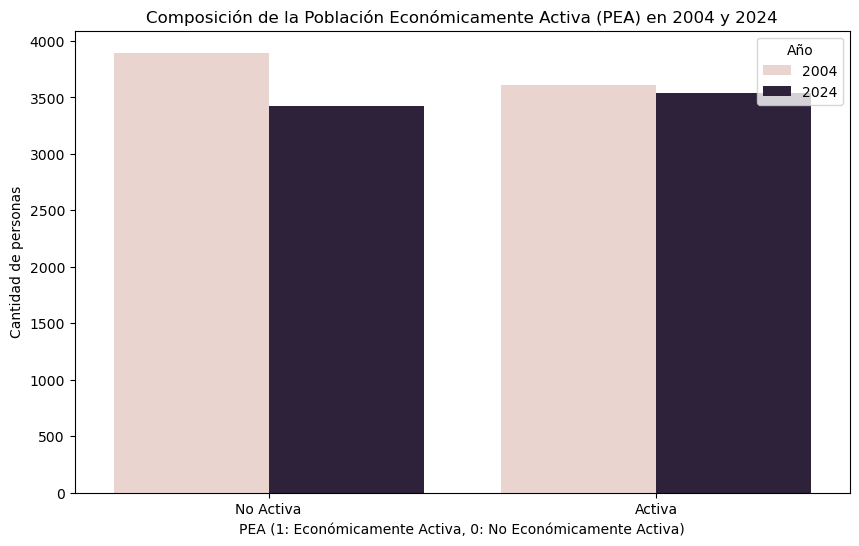

In [59]:
totales = respondieron.groupby(['PEA', 'ano4']).size().reset_index(name='total')
totales['porcentaje'] = totales.groupby('ano4')['total'].transform(lambda x: x / x.sum() * 100)

# Imprimir los porcentajes
print(totales)

# Crear el gráfico de barras mostrando la composición por PEA para 2004 y 2024
plt.figure(figsize=(10, 6))
sns.barplot(x='PEA', y='total', hue='ano4', data=totales)

# Ajustar el título y etiquetas
plt.title('Composición de la Población Económicamente Activa (PEA) en 2004 y 2024')
plt.xlabel('PEA (1: Económicamente Activa, 0: No Económicamente Activa)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No Activa', 'Activa'])
plt.legend(title='Año')


plt.show()

#### Agreguen a la base respondieron una columna llamada PET (Población en Edad para Trabajar) que tome 1 si están la persona tiene entre 15 y 65 años cumplidos. Realicen un gráfico de barras mostrandola composición por PEA para 2004 y 2024. Comenten los resultados y compare PET con PEA.

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\2067055724.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\2067055724.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\2067055724.py:6: SettingWithCopyWarning: 
A value is trying to be set on a 

   PET  ano4  total  porcentaje
0    0  2004   2609   34.777393
1    0  2024   2284   32.820808
2    1  2004   4893   65.222607
3    1  2024   4675   67.179192


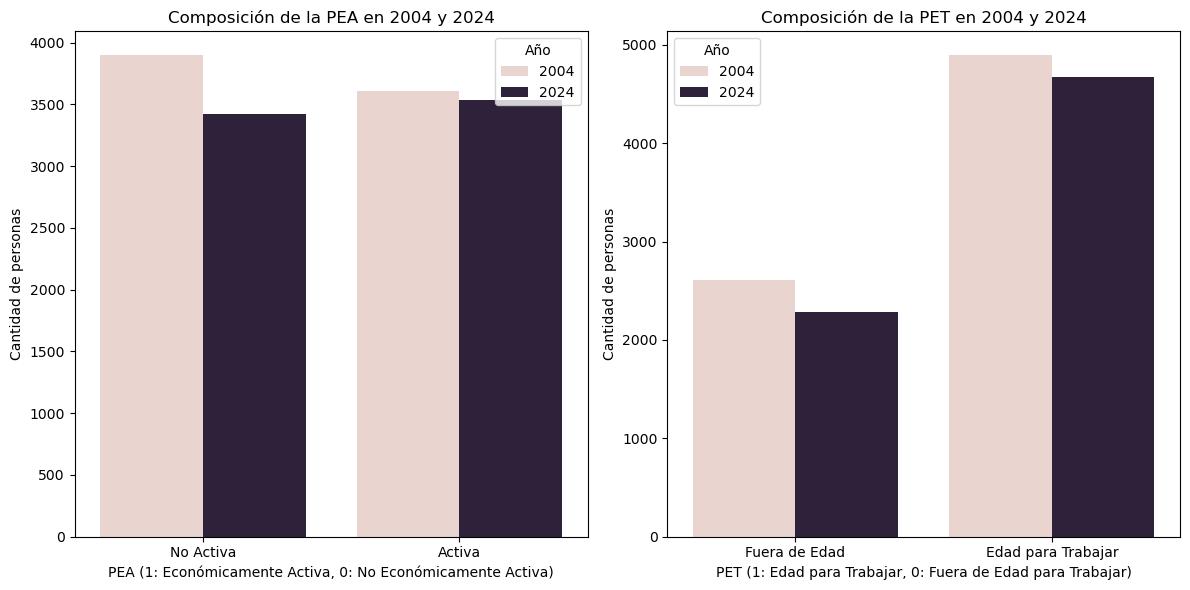

In [61]:

# Agregar la columna 'PET' (1 si la persona tiene entre 15 y 65 años, 0 si no)
respondieron['PET'] = respondieron['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

# Ya tenemos la columna 'PEA' creada previamente
# Si no, agregarla de nuevo
respondieron['PEA'] = respondieron['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


totales = respondieron.groupby(['PET', 'ano4']).size().reset_index(name='total')
totales['porcentaje'] = totales.groupby('ano4')['total'].transform(lambda x: x / x.sum() * 100)

# Imprimir los porcentajes
print(totales)


# Gráfico de barras mostrando la composición por PEA para 2004 y 2024
plt.figure(figsize=(12, 6))

# Gráfico para la PEA
plt.subplot(1, 2, 1)
sns.countplot(x='PEA', hue='ano4', data=respondieron)
plt.title('Composición de la PEA en 2004 y 2024')
plt.xlabel('PEA (1: Económicamente Activa, 0: No Económicamente Activa)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['No Activa', 'Activa'])
plt.legend(title='Año')

# Gráfico para la PET
plt.subplot(1, 2, 2)
sns.countplot(x='PET', hue='ano4', data=respondieron)
plt.title('Composición de la PET en 2004 y 2024')
plt.xlabel('PET (1: Edad para Trabajar, 0: Fuera de Edad para Trabajar)')
plt.ylabel('Cantidad de personas')
plt.xticks([0, 1], ['Fuera de Edad', 'Edad para Trabajar'])
plt.legend(title='Año')

# Mostrar los gráficos
plt.tight_layout()
plt.show()

#### 6) Por ultimo, agreguen la base respondieron una columna llamada desocupado que tome 1 si esta desocupada. ¿Cuántas personas están desocupadas en 2004 vs 2024? a. (Opcional) Muestre la proporción de desocupados por nivel educativo comparando 2004 vs 2024. ¿Hubo cambios de desocupados por nivel educativo? b. (Opcional) Cree una variable categórica de años cumplidos (CH06) agrupada de a 10 años. Muestre proporción de desocupados por edad agrupada comparando 2004 vs 2024. ¿Hubo cambios de desocupados por edad?

In [63]:
# Agregar la columna 'desocupado' (1 si la persona está desocupada, 0 si no lo está)
respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)

# Contar cuántas personas están desocupadas en 2004 y 2024
desocupados_2004 = respondieron[(respondieron['ano4'] == 2004) & (respondieron['desocupado'] == 1)].shape[0]
desocupados_2024 = respondieron[(respondieron['ano4'] == 2024) & (respondieron['desocupado'] == 1)].shape[0]

print(f"Personas desocupadas en 2004: {desocupados_2004}")
print(f"Personas desocupadas en 2024: {desocupados_2024}")


Personas desocupadas en 2004: 528
Personas desocupadas en 2024: 311


C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\1267557251.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\1267557251.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['desocupado'] = respondieron['estado'].apply(lambda x: 1 if x == 2 else 0)


C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\2270865164.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nivel_educativo_2004 = respondieron[respondieron['ano4'] == 2004].groupby('nivel_ed_or')['desocupado'].mean() * 100
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\2270865164.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nivel_educativo_2024 = respondieron[respondieron['ano4'] == 2024].groupby('nivel_ed_or')['desocupado'].mean() * 100


Proporción de desocupados por nivel educativo en 2004:
nivel_ed_or
0     0.445104
1     3.064861
2     6.588670
3     7.798834
4    12.661738
5    13.571429
6     5.564142
Name: desocupado, dtype: float64

Proporción de desocupados por nivel educativo en 2024:
nivel_ed_or
0    0.000000
1    0.230947
2    4.729730
3    3.917379
4    8.119925
5    6.971429
6    2.540835
Name: desocupado, dtype: float64


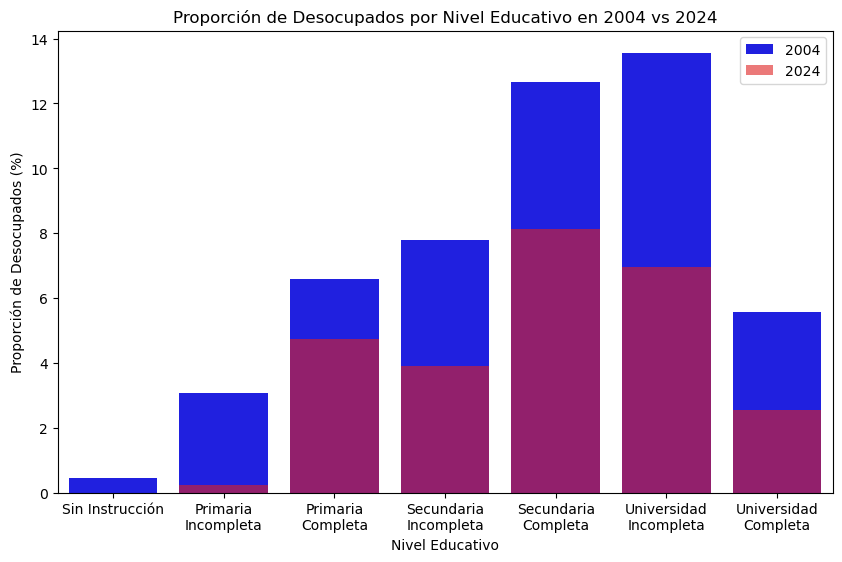

In [65]:
# Calcular la proporción de desocupados por nivel educativo para 2004 y 2024
nivel_educativo_2004 = respondieron[respondieron['ano4'] == 2004].groupby('nivel_ed_or')['desocupado'].mean() * 100
nivel_educativo_2024 = respondieron[respondieron['ano4'] == 2024].groupby('nivel_ed_or')['desocupado'].mean() * 100

# Mostrar los resultados
print("Proporción de desocupados por nivel educativo en 2004:")
print(nivel_educativo_2004)
print("\nProporción de desocupados por nivel educativo en 2024:")
print(nivel_educativo_2024)

# Gráfico de barras para comparar
plt.figure(figsize=(10, 6))
sns.barplot(x=nivel_educativo_2004.index, y=nivel_educativo_2004.values, color='blue', label='2004')
sns.barplot(x=nivel_educativo_2024.index, y=nivel_educativo_2024.values, color='red', alpha=0.6, label='2024')
plt.title('Proporción de Desocupados por Nivel Educativo en 2004 vs 2024')
plt.xlabel('Nivel Educativo')
plt.ylabel('Proporción de Desocupados (%)')
plt.legend()

nuevos_nombres = ['Sin Instrucción', 'Primaria\nIncompleta', 'Primaria\nCompleta', 'Secundaria\nIncompleta','Secundaria\nCompleta', 'Universidad\nIncompleta','Universidad\nCompleta']  # Ajusta esto según tus datos
plt.xticks(ticks=range(len(nuevos_nombres)), labels=nuevos_nombres)
plt.show()


In [67]:
respondieron[respondieron['ano4'] == 2004]["nivel_ed_or"]

0       3
1       2
2       2
3       2
4       6
       ..
7507    0
7508    2
7509    2
7510    1
7511    4
Name: nivel_ed_or, Length: 7502, dtype: category
Categories (7, int32): [0, 1, 2, 3, 4, 5, 6]

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3090058089.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  respondieron['edad_grupos'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3090058089.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  respondieron['edad_grupos'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\3090058089.py:5: FutureWarning: The default of observed

Proporción de desocupados por grupos de edad en 2004:
edad_grupos
[0, 10)       0.000000
[10, 20)      6.973180
[20, 30)     15.297907
[30, 40)      8.713273
[40, 50)      5.902004
[50, 60)      8.823529
[60, 70)      5.769231
[70, 80)      1.793722
[80, 90)      0.529101
[90, 100)     0.000000
Name: desocupado, dtype: float64

Proporción de desocupados por grupos de edad en 2024:
edad_grupos
[0, 10)       0.000000
[10, 20)      3.355079
[20, 30)     11.354582
[30, 40)      4.826038
[40, 50)      6.295908
[50, 60)      3.919240
[60, 70)      3.092784
[70, 80)      0.790514
[80, 90)      0.000000
[90, 100)     0.000000
Name: desocupado, dtype: float64


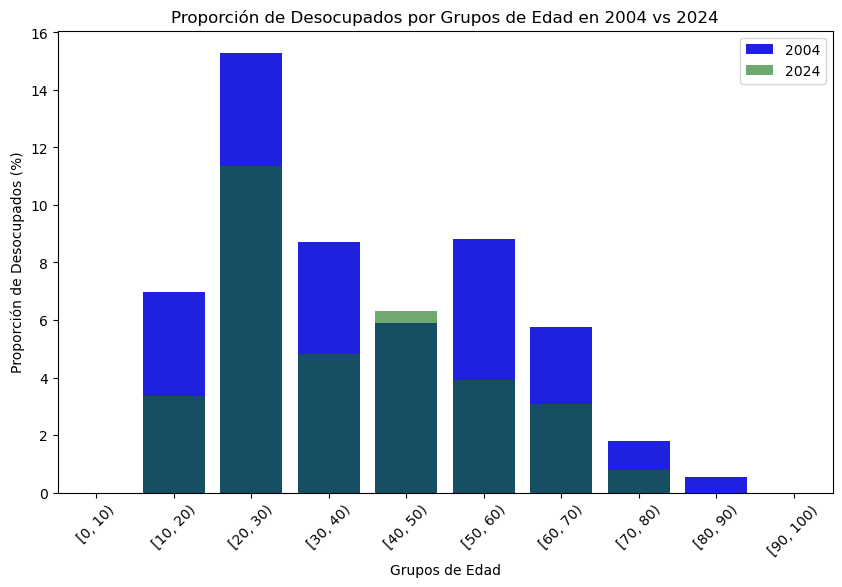

In [69]:
# Crear una variable categórica de edad agrupada por décadas (intervalos de 10 años)
respondieron['edad_grupos'] = pd.cut(respondieron['ch06'], bins=range(0, 101, 10), right=False)

# Calcular la proporción de desocupados por grupos de edad en 2004 y 2024
edad_grupos_2004 = respondieron[respondieron['ano4'] == 2004].groupby('edad_grupos')['desocupado'].mean() * 100
edad_grupos_2024 = respondieron[respondieron['ano4'] == 2024].groupby('edad_grupos')['desocupado'].mean() * 100

# Mostrar los resultados
print("Proporción de desocupados por grupos de edad en 2004:")
print(edad_grupos_2004)
print("\nProporción de desocupados por grupos de edad en 2024:")
print(edad_grupos_2024)

# Gráfico de barras para comparar
plt.figure(figsize=(10, 6))
sns.barplot(x=edad_grupos_2004.index.astype(str), y=edad_grupos_2004.values, color='blue', label='2004')
sns.barplot(x=edad_grupos_2024.index.astype(str), y=edad_grupos_2024.values, color='green', alpha=0.6, label='2024')
plt.title('Proporción de Desocupados por Grupos de Edad en 2004 vs 2024')
plt.xlabel('Grupos de Edad')
plt.ylabel('Proporción de Desocupados (%)')
plt.legend()
plt.xticks(rotation=45)
plt.show()


#### Ejercicio 7

In [71]:
tucuman_2004 = EPH2004[(EPH2004['ano4'] == 2004) & (EPH2004["aglomerado"] == "Gran Tucumán - Tafí Viejo")]
tucuman_2024 = EPH2024[(EPH2024['ano4'] == 2024) & (EPH2024['aglomerado'] == 29)]

tucuman_2004["estado"] = tucuman_2004["estado"].map(mapeo_cond_actividad)
tucuman_2004["estado"] 


EPH_t= pd.concat([tucuman_2004, tucuman_2024], ignore_index=True)

EPH_t["ch06"] = pd.to_numeric(EPH_t['ch06'], errors='coerce')
EPH_t["ch06"] = EPH_t[EPH_t["ch06"] > 0]["ch06"] 

# Eliminar filas con NaN en 'columna1'
EPH_t = EPH_t.dropna(subset=['ch06'])

# Restablecer el índice (opcional)
EPH_t.reset_index(drop=True, inplace=True)

print(EPH_t)

                             codusu  nro_hogar componente  h15    ano4  \
0                          125463          1.0        1.0   Sí  2004.0   
1                          125463          1.0        2.0   Sí  2004.0   
2                          125463          1.0        3.0  0.0  2004.0   
3                          125463          1.0        5.0   Sí  2004.0   
4                          125571          1.0        2.0   Sí  2004.0   
...                             ...        ...        ...  ...     ...   
4594  TQRMNORUYHMOLUCDEHPJB00801354        1.0          2    1  2024.0   
4595  TQRMNORUYHMOLUCDEHPJB00801354        1.0          3    1  2024.0   
4596  TQRMNORUYHMOLUCDEHPJB00801354        1.0          4    1  2024.0   
4597  TQRMNORUYHMOLUCDEHPJB00801354        1.0          5    0  2024.0   
4598  TQRMNOPWPHLMLPCDEHPJB00854501        1.0          1    1  2024.0   

           trimestre region mas_500                 aglomerado  pondera  ...  \
0     1er. Trimestre    NOA    

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\1381463819.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tucuman_2004["estado"] = tucuman_2004["estado"].map(mapeo_cond_actividad)


In [73]:
EPH_t['PET'] = EPH_t['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)

EPH_t['PEA'] = EPH_t['estado'].apply(lambda x: 1 if x in [1, 2] else 0)

C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\1411606449.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  EPH_t['PET'] = EPH_t['ch06'].apply(lambda x: 1 if 15 <= x <= 65 else 0)
C:\Users\gabib\AppData\Local\Temp\ipykernel_14432\1411606449.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  EPH_t['PEA'] = EPH_t['estado'].apply(lambda x: 1 if x in [1, 2] else 0)


    Año  Tasa INDEC (%)  Tasa Alternativa (%)
0  2004       83.111954             55.443038
1  2024       91.717791             62.334955


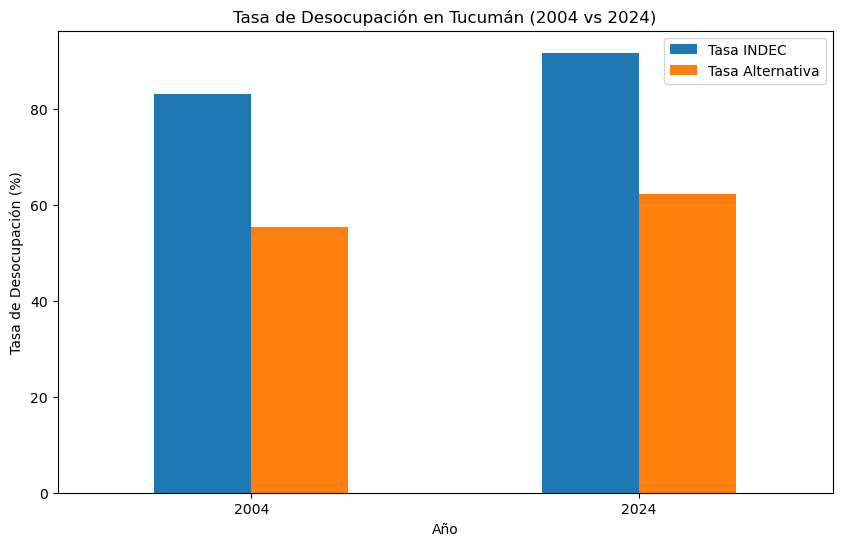

In [75]:
# Calcular la tasa de desocupación según INDEC (Desocupados / PEA)
def calcular_tasa_desocupacion(df):
    desocupados = df[df['estado'] == 1].shape[0]
    PEA = df[df['PEA'] == 1].shape[0]
    return (desocupados / PEA) * 100 if PEA > 0 else 0

tasa_desocupacion_indec_2004 = calcular_tasa_desocupacion(EPH_t[EPH_t["ano4"] == 2004])
tasa_desocupacion_indec_2024 = calcular_tasa_desocupacion(EPH_t[EPH_t["ano4"] == 2024])

# Calcular la tasa de desocupación alternativa (Desocupados / PET)
def calcular_tasa_desocupacion_alternativa(df):
    desocupados = df[df['estado'] == 1].shape[0]
    PET = df[df['PET'] == 1].shape[0]
    return (desocupados / PET) * 100 if PET > 0 else 0

tasa_desocupacion_alt_2004 = calcular_tasa_desocupacion_alternativa(EPH_t[EPH_t["ano4"] == 2004])
tasa_desocupacion_alt_2024 = calcular_tasa_desocupacion_alternativa(EPH_t[EPH_t["ano4"] == 2024])

# Crear un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Año': [2004, 2024],
    'Tasa INDEC (%)': [tasa_desocupacion_indec_2004, tasa_desocupacion_indec_2024],
    'Tasa Alternativa (%)': [tasa_desocupacion_alt_2004, tasa_desocupacion_alt_2024]
})

# Mostrar los resultados
print(resultados)

# Graficar los resultados
resultados.set_index('Año').plot(kind='bar', figsize=(10, 6))
plt.title('Tasa de Desocupación en Tucumán (2004 vs 2024)')
plt.ylabel('Tasa de Desocupación (%)')
plt.xticks(rotation=0)
plt.legend(['Tasa INDEC', 'Tasa Alternativa'])
plt.show()

## Parte 2: Clasificación

##### Descenso a la locura

In [135]:
for i in respondieron.columns:
    for x in respondieron[i]:
        if x == "costa atlantica":
                print(i)

pp09a_esp


In [137]:
# Filtrar columnas que tienen al menos un NaN

columns_with_nan = respondieron.columns[respondieron.isna().any()].tolist()

# Crear un nuevo DataFrame solo con las columnas que tienen NaN
df_nan_columns = respondieron[columns_with_nan]

# Contar NaN en cada columna y convertir a DataFrame
nan_counts = respondieron[columns_with_nan].isna().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

print("\nDataFrame con columnas que contienen al menos un NaN y su cantidad:")
nan_counts




DataFrame con columnas que contienen al menos un NaN y su cantidad:


,Column,NaN Count
0,h15,1099
1,ch03,139
2,ch07,337
3,ch08,4
4,ch10,132
...,...,...
111,v11_m,14
112,v12_m,51
113,v18_m,2
114,v21_m,73


In [139]:
respondieron_limpio = respondieron.drop(["h15"], axis=1)

respondieron_limpio

,componente,ano4,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,ch09,...,tiene/busca_trabajo,cobertura_m,cobertura_m2,nivel_ed_or,inac_eco,inac_neco,PEA,PET,desocupado,edad_grupos
0,1.0,2004,32,1299.0,1,1,79.0,4.0,1.0,1,...,0,1,0,3,1,0,0,0,0,"[70, 80)"
1,1.0,2004,32,2018.0,1,2,67.0,NaN,4.0,1,...,1,0,0,2,0,0,1,0,0,"[60, 70)"
2,1.0,2004,32,1486.0,1,2,74.0,4.0,1.0,1,...,0,1,0,2,1,0,0,0,0,"[70, 80)"
3,1.0,2004,32,1674.0,1,1,54.0,2.0,2.0,1,...,1,1,0,2,0,0,1,1,0,"[50, 60)"
4,2.0,2004,32,1674.0,2,2,51.0,2.0,2.0,1,...,0,1,0,6,1,0,0,1,0,"[50, 60)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14503,1,2024,33,2818.0,1,2,68.0,2.0,1.0,1,...,0,1,0,6,1,0,0,0,0,"[60, 70)"
14504,2,2024,33,2818.0,2,1,63.0,2.0,1.0,1,...,1,1,0,4,0,0,1,1,1,"[60, 70)"
14505,3,2024,33,2818.0,3,1,33.0,5.0,1.0,1,...,1,1,0,6,0,0,1,1,0,"[30, 40)"
14506,4,2024,33,2818.0,3,2,33.0,5.0,1.0,1,...,1,1,0,6,0,0,1,1,0,"[30, 40)"


In [141]:
# Filtrar columnas que tienen al menos un NaN

columns_with_nan = respondieron_limpio.columns[respondieron_limpio.isna().any()].tolist()

# Crear un nuevo DataFrame solo con las columnas que tienen NaN
df_nan_columns = respondieron_limpio[columns_with_nan]

# Contar NaN en cada columna y convertir a DataFrame
nan_counts = respondieron_limpio[columns_with_nan].isna().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

print("\nDataFrame con columnas que contienen al menos un NaN y su cantidad:")
nan_counts




DataFrame con columnas que contienen al menos un NaN y su cantidad:


,Column,NaN Count
0,ch03,139
1,ch07,337
2,ch08,4
3,ch10,132
4,ch11,5227
...,...,...
110,v11_m,14
111,v12_m,51
112,v18_m,2
113,v21_m,73


In [143]:
nan_counts[nan_counts["NaN Count"] == 6648]
#Son todas de preguntas si esta desempleado, y hace cuanto
#Creo que no vale la pena dejarlas por eso. Medio raro. 

descartar = nan_counts[nan_counts["NaN Count"] == 6648]["Column"]
respondieron_limpio = respondieron_limpio.drop(descartar, axis=1)


In [145]:
#137 y 92
nan_counts[nan_counts["NaN Count"] > 6648]
#ch16_cod (Especificación de otro pais, provincia, etc)
#pp09a_esp (Muy parecido al anterior)  
#pp11d_cod (A que se dedicaba en su empleo anterior (desocupado))
descartar = nan_counts[nan_counts["NaN Count"] > 6648]["Column"]
respondieron_limpio = respondieron_limpio.drop(descartar, axis=1)

In [147]:
#134 y 89
nan_counts[nan_counts["NaN Count"] > 3750]
#Ch11 --> Tipo de establecimiento educativo
#Ch15_cod --> Especifica el otro pais provincia o pais limitrofe. 
#Cat_ocup --> Categoria ocupacional
#pp11b_cod --> A que se dedicaba (desocupado)

respondieron_limpio = respondieron_limpio.drop(["ch15_cod","pp11b_cod"], axis=1)

In [149]:
respondieron_limpio[respondieron_limpio["ch11"].isna()]["ch10"].value_counts()
#La mayoria en 2 (no se acuerda) y 3(nunca fue)

respondieron_limpio.loc[respondieron_limpio['ch10'] == "2", 'ch11'] = "9"
respondieron_limpio.loc[respondieron_limpio['ch10'] == "3", 'ch11'] = "0"

In [151]:
nan_counts[nan_counts["Column"] == "ch10"] #La misma cantidad que queda
                                           #de Nan en ch11 --> Menores de 2
respondieron_limpio[respondieron_limpio["ch11"].isna()]["ch09"].value_counts()
respondieron_limpio['ch09'] = pd.to_numeric(respondieron_limpio['ch09'])

respondieron_limpio["ch09"].value_counts()

respondieron_limpio = respondieron_limpio[respondieron_limpio['ch09'] != 3]
respondieron_limpio.loc[respondieron_limpio['ch09'] == 0, 'ch09'] = 9

nan_counts[nan_counts["Column"] == "ch11"]   #Quedan 2, que se van descartados

respondieron_limpio['ch11'] = pd.to_numeric(respondieron_limpio['ch11'])

respondieron_limpio = respondieron_limpio.dropna(subset=['ch11'])



In [153]:
respondieron_limpio[respondieron_limpio["cat_ocup"].isna()]["estado"].value_counts()
#variado, no parece haber un patrón
respondieron_limpio.loc[respondieron_limpio['cat_ocup'].isna(), 'cat_ocup'] = 0
respondieron_limpio['cat_ocup'] = pd.to_numeric(respondieron_limpio['cat_ocup'])

In [181]:
nan_counts[nan_counts["NaN Count"] == 3446]
#Son todas preguntas condicionales a si trabaja o no. 
    #Todos los Nan son porque la persona no esta "ocupado"
    #Tambien hay 0 que indican lo mismo, los fleto para regresión

descartar = []
for i in nan_counts[nan_counts["NaN Count"] == 3446]["Column"]:
    descartar.append(i)

respondieron_limpio = respondieron_limpio.drop(descartar, axis=1)

KeyError: "['pp03c', 'pp03d', 'pp3e_tot', 'pp3f_tot', 'pp03g', 'pp03h', 'pp03i', 'pp03j', 'intensi', 'pp04a', 'pp04b_cod', 'pp04b1', 'pp04b2', 'pp04b3_mes', 'pp04b3_ano', 'pp04b3_dia', 'pp04c', 'pp04c99', 'pp04d_cod', 'pp04g', 'pp05b2_mes', 'pp05b2_ano', 'pp05b2_dia', 'pp05c_1', 'pp05c_2', 'pp05c_3', 'pp05e', 'pp05f', 'pp05h', 'pp06a', 'pp06c', 'pp06d', 'pp06e', 'pp06h', 'pp07a', 'pp07c', 'pp07d', 'pp07e', 'pp07f1', 'pp07f2', 'pp07f3', 'pp07f4', 'pp07f5', 'pp07g1', 'pp07g2', 'pp07g3', 'pp07g4', 'pp07g_59', 'pp07h', 'pp07i', 'pp07j', 'pp07k', 'pp08d1', 'pp08d4', 'pp08f1', 'pp08f2', 'pp08j1', 'pp08j2', 'pp08j3', 'pp09a', 'pp09b', 'pp09c'] not found in axis"

In [157]:
nan_counts[nan_counts["NaN Count"] > 300]
#Ch07 es el estado civil
#Ch14 --> El nivel del ultimo año
#Cat_inac --> Categoria inactivo
#p21     ---> Ingreso de ocupación principal
#p47t  --> Monto total individual (suma laborales y no) Depende de p21 y t_vi
#t_vi   --> Ingresos totales no laborales

,Column,NaN Count
1,ch07,337
4,ch11,5227
5,ch12,405
6,ch13,405
7,ch14,3618
...,...,...
99,pp11s,6648
100,pp11t,6648
101,p21,946
103,p47t,1292


In [159]:
respondieron[respondieron["ch07"].isna()]["ch06"].min()
#No parece que sea por la edad, el min es 18
respondieron["ch07"].value_counts()
#No hay 9 ni 0  --> Posiblemente los Nan sean Ns/Nr
respondieron_limpio.loc[respondieron_limpio['ch07'].isna(), 'ch07'] = 9

###----ch14
respondieron[respondieron["ch14"].isna()]["ch13"].value_counts()
#Son 0 [no aplica] y 1 [aprobo]
respondieron_limpio['ch13'] = pd.to_numeric(respondieron_limpio['ch13'])

respondieron["ch14"].value_counts()
respondieron_limpio.loc[(respondieron_limpio['ch14'].isna()) & (respondieron_limpio['ch13'] == 0), 'ch14'] = 0
respondieron_limpio.loc[(respondieron_limpio['ch14'].isna()) & (respondieron_limpio['ch13'] == 1), 'ch14'] = 99


In [161]:
print(respondieron[respondieron["p21"].isna()]["estado"].value_counts())
#Todos los Nan son de personas ocupadas, mientras que los 0 en p21 pueden ser de cualquiera
#Los fleto por ser raros --> No sé de que depende.
#Capaz que tambien se puede fletar la columna directamente
respondieron_limpio = respondieron_limpio.dropna(subset=['p21'])
#Como t_vi depende de otras, muchos de los Nan depende de un Nan en estas
ing_no_laborales = ["v2_m","v3_m","v4_m","v5_m","v8_m","v9_m","v10_m","v11_m","v12_m","v18_m","v19_am","v21_m"]
respondieron_limpio = respondieron_limpio.dropna(subset=ing_no_laborales)

#El resto que tiene todos los valores, lo igualamos a la suma total

estado
1    946
Name: count, dtype: int64


In [163]:
respondieron_limpio[respondieron_limpio["t_vi"].isna()][ing_no_laborales]
respondieron_limpio.loc[respondieron_limpio["t_vi"].isna(), "t_vi"] = respondieron_limpio.loc[respondieron_limpio["t_vi"].isna(), ing_no_laborales].sum(axis=1)


In [165]:
respondieron_limpio[respondieron_limpio["cat_inac"].isna()]["estado"].value_counts()
respondieron_limpio.loc[respondieron_limpio["cat_inac"].isna(), "cat_inac"] = 0
respondieron_limpio.loc[respondieron_limpio["p47t"].isna(), "p47t"] = respondieron_limpio.loc[respondieron_limpio["p47t"].isna(), ["p21","t_vi"]].sum(axis=1)


In [167]:
respondieron_limpio[respondieron_limpio["tot_p12"].isna()]["estado"].value_counts()
respondieron_limpio = respondieron_limpio.dropna(subset="tot_p12")
respondieron_limpio = respondieron_limpio.drop("ch03", axis=1)



In [169]:
respondieron_limpio[respondieron_limpio["ch12"].isna()]["ch13"].value_counts()
respondieron_limpio.loc[respondieron_limpio["ch12"].isna(), "ch12"] = 0
respondieron_limpio.loc[respondieron_limpio["ch13"].isna(), "ch13"] = 0




In [171]:
respondieron_limpio = respondieron_limpio.dropna(subset="ch08")
respondieron_limpio.loc[respondieron_limpio["ch16"].isna(), "ch16"] = 9


In [183]:
# Filtrar columnas que tienen al menos un NaN

columns_with_nan = respondieron_limpio.columns[respondieron_limpio.isna().any()].tolist()

# Crear un nuevo DataFrame solo con las columnas que tienen NaN
df_nan_columns = respondieron_limpio[columns_with_nan]

# Contar NaN en cada columna y convertir a DataFrame
nan_counts = respondieron_limpio[columns_with_nan].isna().sum().reset_index()
nan_counts.columns = ['Column', 'NaN Count']

print("\nDataFrame con columnas que contienen al menos un NaN y su cantidad:")
nan_counts


DataFrame con columnas que contienen al menos un NaN y su cantidad:


,Column,NaN Count


In [203]:
respondieron_limpio[respondieron_limpio["estado"]==2]["cat_inac"].value_counts() #son todos ceros, no tiene sentido dejar cat_inac

cat_inac
0.0    809
1.0      0
2.0      0
3.0      0
4.0      0
5.0      0
6.0      0
7.0      0
Name: count, dtype: int64

In [207]:
respondieron_limpio[respondieron_limpio["estado"]==1]["pp02c3"].value_counts() #son todos ceros, toma valores solo si es desocupado

pp02c3
0.0    5273
Name: count, dtype: int64

In [195]:
respondieron_limpio#hay que ver 76 columnas para chequear que esten todos los NaN descartados
print(respondieron_limpio.columns)
print(respondieron_limpio)

#aglomerado, ch04, ch06, "ch09", ch15 (en duda), p47t, ipcf, pareja actual, cobertura_m, nivel_ed_or

Index(['componente', 'ano4', 'aglomerado', 'pondera', 'ch04', 'ch06', 'ch07',
       'ch08', 'ch09', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16',
       'nivel_ed', 'estado', 'cat_ocup', 'cat_inac', 'pp02c1', 'pp02c2',
       'pp02c3', 'pp02c4', 'pp02c5', 'pp02c6', 'pp02c7', 'pp02c8', 'pp02e',
       'pp02h', 'pp02i', 'p21', 'decocur', 'rdecocur', 'gdecocur', 'adecocur',
       'tot_p12', 'p47t', 'decindr', 'rdecindr', 'gdecindr', 'adecindr',
       'v2_m', 'v3_m', 'v4_m', 'v5_m', 'v8_m', 'v9_m', 'v10_m', 'v11_m',
       'v12_m', 'v18_m', 'v19_am', 'v21_m', 't_vi', 'itf', 'decifr', 'rdecifr',
       'gdecifr', 'adecifr', 'ipcf', 'deccfr', 'rdeccfr', 'gdeccfr', 'adeccfr',
       'pareja_actual', 'tiene/busca_trabajo', 'cobertura_m', 'cobertura_m2',
       'nivel_ed_or', 'inac_eco', 'inac_neco', 'PEA', 'PET', 'desocupado',
       'edad_grupos'],
      dtype='object')
      componente  ano4 aglomerado  pondera ch04  ch06 ch07 ch08  ch09 ch10  \
0            1.0  2004         32

#### 1) Para cada año, partan la base respondieron en una base de prueba (test) y una de entrenamiento (train) utilizando el comando train_test_split. La base de entrenamiento debe comprender el 70% de los datos, y la semilla a utilizar (random state instance) debe ser 101. Establezca a desocupado como su variable dependiente en la base de entrenamiento (vector y). El resto de las variables serán las variables independientes (matriz X). Recuerden agregar la columna de unos (1).

In [209]:
respondieron_final= respondieron_limpio[["aglomerado","ano4","desocupado",'ch04','ch06',"pareja_actual","cobertura_m","ch09","ch15", 'nivel_ed_or', 'ipcf']]

In [211]:
from sklearn.model_selection import train_test_split
import numpy as np

# Filtrar los datos por cada año
data_2004 = respondieron_final[respondieron_final['ano4'] == 2004]
data_2024 =respondieron_final[respondieron_final['ano4'] == 2024]

# Definir las variables independientes (X) y dependientes (y) para cada año
# Excluir la columna 'desocupado' de las variables independientes
X_2004 = data_2004.drop(columns=['desocupado', 'ano4',])  # Eliminar 'desocupado' y 'año'
y_2004 = data_2004['desocupado']  # Variable dependiente

X_2024 = data_2024.drop(columns=['desocupado', 'ano4'])  # Eliminar 'desocupado' y 'año'
y_2024 = data_2024['desocupado']  # Variable dependiente

# Añadir la columna de unos (1) a las variables independientes (matriz X)
X_2004 = np.hstack([np.ones((X_2004.shape[0], 1)), X_2004])  # Añadir columna de unos en el eje 1
X_2024 = np.hstack([np.ones((X_2024.shape[0], 1)), X_2024])  # Añadir columna de unos en el eje 1

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%) usando train_test_split
# Utilizar random_state=101 para asegurar reproducibilidad
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Mostrar los tamaños de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento para 2004: {X_train_2004.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2004: {X_test_2004.shape[0]}")
print(f"Tamaño del conjunto de entrenamiento para 2024: {X_train_2024.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2024: {X_test_2024.shape[0]}")


Tamaño del conjunto de entrenamiento para 2004: 5156
Tamaño del conjunto de prueba para 2004: 2210
Tamaño del conjunto de entrenamiento para 2024: 3950
Tamaño del conjunto de prueba para 2024: 1693


#### Punto 2

##### Modelos 

In [215]:
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos por cada año
data_2004 = respondieron_final[respondieron_final['ano4'] == 2004]
data_2024 =respondieron_final[respondieron_final['ano4'] == 2024]

# Definir las variables independientes (X) y dependientes (y) para cada año
# Excluir la columna 'desocupado' de las variables independientes
X_2004 = data_2004.drop(columns=['desocupado', 'ano4'])  # Eliminar 'desocupado' y 'año'
y_2004 = data_2004['desocupado']  # Variable dependiente

X_2024 = data_2024.drop(columns=['desocupado', 'ano4'])  # Eliminar 'desocupado' y 'año'
y_2024 = data_2024['desocupado']  # Variable dependiente

# Añadir la columna de unos (1) a las variables independientes (matriz X)
X_2004 = np.hstack([np.ones((X_2004.shape[0], 1)), X_2004])  # Añadir columna de unos en el eje 1
X_2024 = np.hstack([np.ones((X_2024.shape[0], 1)), X_2024])  # Añadir columna de unos en el eje 1

# Dividir los datos en conjuntos de entrenamiento (70%) y prueba (30%) usando train_test_split
# Utilizar random_state=101 para asegurar reproducibilidad
X_train_2004, X_test_2004, y_train_2004, y_test_2004 = train_test_split(X_2004, y_2004, test_size=0.3, random_state=101)
X_train_2024, X_test_2024, y_train_2024, y_test_2024 = train_test_split(X_2024, y_2024, test_size=0.3, random_state=101)

# Mostrar los tamaños de los conjuntos de entrenamiento y prueba
print(f"Tamaño del conjunto de entrenamiento para 2004: {X_train_2004.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2004: {X_test_2004.shape[0]}")
print(f"Tamaño del conjunto de entrenamiento para 2024: {X_train_2024.shape[0]}")
print(f"Tamaño del conjunto de prueba para 2024: {X_test_2024.shape[0]}")


Tamaño del conjunto de entrenamiento para 2004: 5156
Tamaño del conjunto de prueba para 2004: 2210
Tamaño del conjunto de entrenamiento para 2024: 3950
Tamaño del conjunto de prueba para 2024: 1693


Modelo: Regresión Logística - 2004
Exactitud (Accuracy): 0.93
AUC: 0.67
Matriz de Confusión:
[[2058    0]
 [ 152    0]]


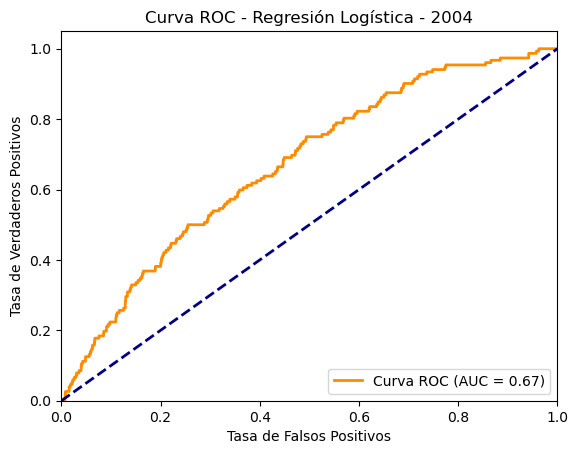

Modelo: Análisis Discriminante Lineal - 2004
Exactitud (Accuracy): 0.93
AUC: 0.75
Matriz de Confusión:
[[2057    1]
 [ 152    0]]


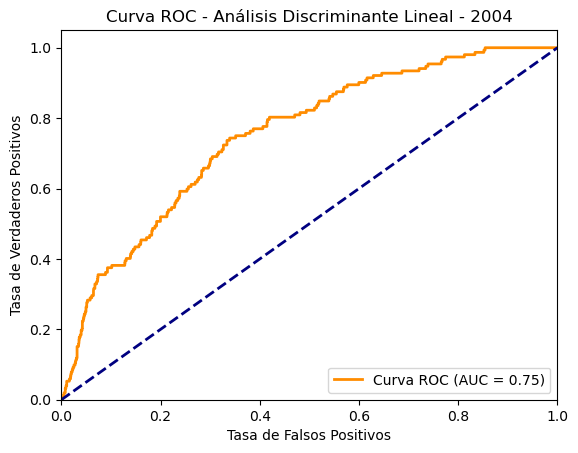

Modelo: KNN (k=3) - 2004
Exactitud (Accuracy): 0.92
AUC: 0.60
Matriz de Confusión:
[[2022   36]
 [ 144    8]]


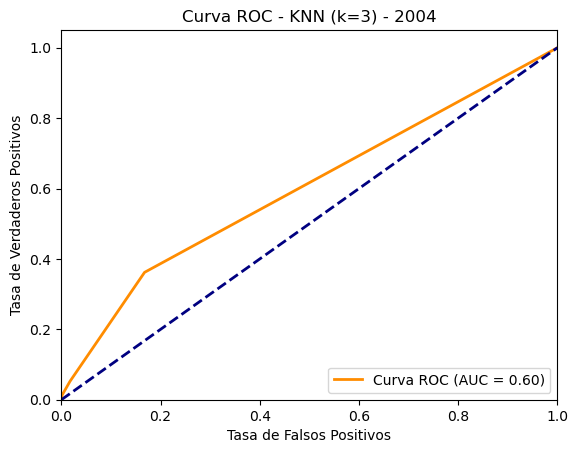

Modelo: Naive Bayes - 2004
Exactitud (Accuracy): 0.93
AUC: 0.60
Matriz de Confusión:
[[2058    0]
 [ 152    0]]


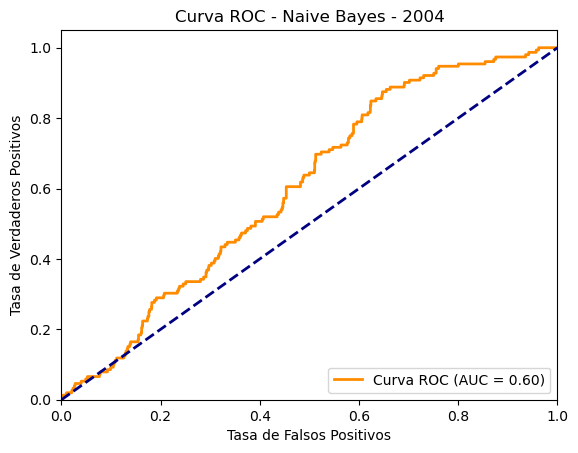

In [217]:
#Para 2004 completo

# Función para graficar la curva ROC
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Función para evaluar un modelo y reportar métricas
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre_modelo):
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en los datos de prueba
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
    
    # Calcular las métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_valor = roc_auc_score(y_test, y_pred_prob)
    
    # Reportar resultados
    print(f"Modelo: {nombre_modelo}")
    print(f"Exactitud (Accuracy): {accuracy:.2f}")
    print(f"AUC: {auc_valor:.2f}")
    print("Matriz de Confusión:")
    print(matriz_confusion)
    
    # Graficar la curva ROC
    plot_roc_curve(y_test, y_pred_prob, nombre_modelo)

# Preparar datos para entrenamiento y prueba (ya divididos previamente para 2024)
# X_train_2024, X_test_2024, y_train_2024, y_test_2024

# Regresión Logística para 2004
modelo_log = LogisticRegression()
evaluar_modelo(modelo_log, X_train_2004, X_test_2004, y_train_2004, y_test_2004, 'Regresión Logística - 2004')

# Análisis Discriminante Lineal para 2004
modelo_lda = LinearDiscriminantAnalysis()
evaluar_modelo(modelo_lda, X_train_2004, X_test_2004, y_train_2004, y_test_2004, 'Análisis Discriminante Lineal - 2004')

# KNN con k=3 para 2004
modelo_knn = KNeighborsClassifier(n_neighbors=3)
evaluar_modelo(modelo_knn, X_train_2004, X_test_2004, y_train_2004, y_test_2004, 'KNN (k=3) - 2004')

# Naive Bayes para 2004
modelo_nb = GaussianNB()
evaluar_modelo(modelo_nb, X_train_2004, X_test_2004, y_train_2004, y_test_2004, 'Naive Bayes - 2004')


Modelo: Regresión Logística - 2024
Exactitud (Accuracy): 0.95
AUC: 0.73
Matriz de Confusión:
[[1611    0]
 [  82    0]]


C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


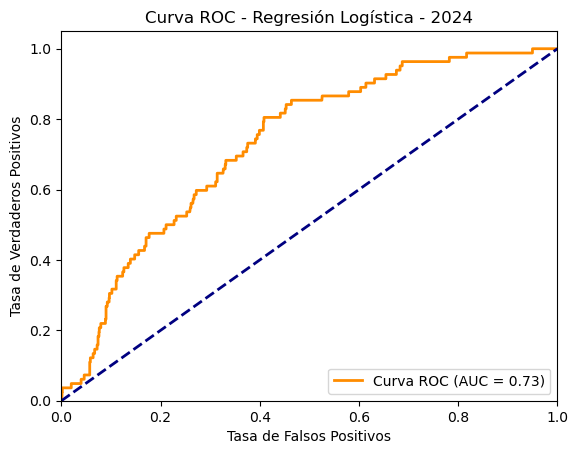

Modelo: Análisis Discriminante Lineal - 2024
Exactitud (Accuracy): 0.95
AUC: 0.77
Matriz de Confusión:
[[1611    0]
 [  82    0]]


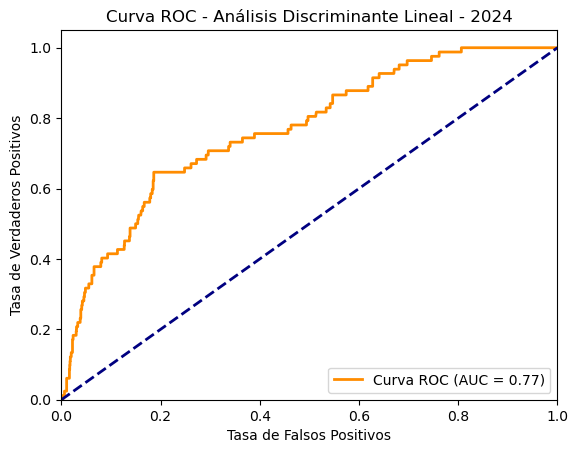

Modelo: KNN (k=3) - 2024
Exactitud (Accuracy): 0.94
AUC: 0.58
Matriz de Confusión:
[[1593   18]
 [  77    5]]


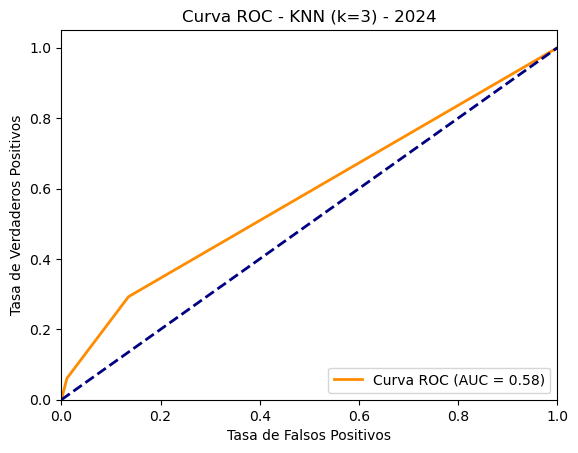

Modelo: Naive Bayes - 2024
Exactitud (Accuracy): 0.95
AUC: 0.71
Matriz de Confusión:
[[1611    0]
 [  82    0]]


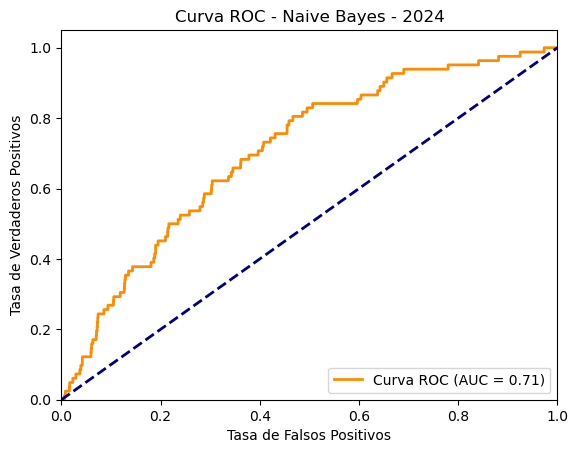

In [219]:
#Para 2024 completo

# Función para graficar la curva ROC
def plot_roc_curve(y_test, y_pred_prob, model_name):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title(f'Curva ROC - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Función para evaluar un modelo y reportar métricas
def evaluar_modelo(modelo, X_train, X_test, y_train, y_test, nombre_modelo):
    # Entrenar el modelo
    modelo.fit(X_train, y_train)
    
    # Predecir en los datos de prueba
    y_pred = modelo.predict(X_test)
    y_pred_prob = modelo.predict_proba(X_test)[:, 1]  # Probabilidades para la clase positiva
    
    # Calcular las métricas
    matriz_confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    auc_valor = roc_auc_score(y_test, y_pred_prob)
    
    # Reportar resultados
    print(f"Modelo: {nombre_modelo}")
    print(f"Exactitud (Accuracy): {accuracy:.2f}")
    print(f"AUC: {auc_valor:.2f}")
    print("Matriz de Confusión:")
    print(matriz_confusion)
    
    # Graficar la curva ROC
    plot_roc_curve(y_test, y_pred_prob, nombre_modelo)

# Preparar datos para entrenamiento y prueba (ya divididos previamente para 2024)
# X_train_2024, X_test_2024, y_train_2024, y_test_2024

# Regresión Logística para 2024
modelo_log = LogisticRegression()
evaluar_modelo(modelo_log, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Regresión Logística - 2024')

# Análisis Discriminante Lineal para 2024
modelo_lda = LinearDiscriminantAnalysis()
evaluar_modelo(modelo_lda, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Análisis Discriminante Lineal - 2024')

# KNN con k=3 para 2024
modelo_knn = KNeighborsClassifier(n_neighbors=3)
evaluar_modelo(modelo_knn, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'KNN (k=3) - 2024')

# Naive Bayes para 2024
modelo_nb = GaussianNB()
evaluar_modelo(modelo_nb, X_train_2024, X_test_2024, y_train_2024, y_test_2024, 'Naive Bayes - 2024')


In [241]:
#Prediccion en base a NO RESPONDIERON


modelo_lda.fit(X_train_2024, y_train_2024)

# Predecir el estado de desocupación en el conjunto "norespondieron"
X_norespondieron = norespondieron[["aglomerado","ano4",'ch04','ch06',"pareja_actual","cobertura_m","ch09","ch15", 'nivel_ed_or', 'ipcf']]  # Asegúrate de que tenga las mismas columnas que X_train
predicciones = modelo_lda.predict(X_norespondieron)

# Añadir las predicciones al dataset "norespondieron"
norespondieron['prediccion_desocupado'] = predicciones

# Calcular la proporción de personas predichas como desocupadas
cantidad_desocupados = (norespondieron['prediccion_desocupado'] == 1).sum()  # Asegúrate de que '1' representa desocupado
cantidad_total = len(norespondieron)
proporcion_desocupados = cantidad_desocupados / cantidad_total

print(f'Proporción de personas predichas como desocupadas: {proporcion_desocupados:.2%}')


C:\Users\gabib\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


TypeError: can't multiply sequence by non-int of type 'float'

In [227]:


# Dividir los datos de entrenamiento en variables independientes (X) y dependiente (y)
X_train = respondieron_final.drop(columns=['desocupado', 'ano4'])  # Excluyendo 'desocupado' y 'ano4'
y_train = respondieron_final['desocupado']

# Entrenar el modelo LDA

modelo_lda.fit(X_train, y_train)

# Asegurarse de que "norespondieron" tenga las mismas columnas para la predicción
X_norespondieron = norespondieron[X_train.columns]  # Seleccionar solo las columnas relevantes

# Realizar predicciones de desocupación en el conjunto "norespondieron"
predicciones = modelo_lda.predict(X_norespondieron)

# Añadir las predicciones al dataset "norespondieron"
norespondieron['prediccion_desocupado'] = predicciones

# Calcular la proporción de personas predichas como desocupadas
cantidad_desocupados = (norespondieron['prediccion_desocupado'] == 1).sum()  # Asumiendo '1' representa desocupado
cantidad_total = len(norespondieron)
proporcion_desocupados = cantidad_desocupados / cantidad_total

print(f'Proporción de personas predichas como desocupadas: {proporcion_desocupados:.2%}')


TypeError: can't multiply sequence by non-int of type 'float'

In [245]:
norespondieron

,componente,h15,ano4,aglomerado,pondera,ch03,ch04,ch06,ch07,ch08,...,rdeccfr,gdeccfr,adeccfr,pareja_actual,tiene/busca_trabajo,cobertura_m,cobertura_m2,nivel_ed_or,inac_eco,inac_neco
1568,1.0,2,2004,32,1568.0,1,1,21.0,5.0,3.0,...,01,01,01,0,0,1,0,3,0,0
2170,1.0,2,2004,33,1589.0,1,2,49.0,4.0,4.0,...,00,00,00,0,0,0,0,2,0,0
2171,2.0,2,2004,33,1589.0,3,1,24.0,5.0,1.0,...,00,00,00,0,0,1,0,3,0,0
2172,3.0,2,2004,33,1589.0,3,2,20.0,5.0,4.0,...,00,00,00,0,0,0,0,4,0,0
2433,2.0,2,2004,33,1728.0,3,2,35.0,NaN,4.0,...,05,05,06,0,0,0,0,5,0,0
2914,4.0,2,2004,33,1796.0,4,1,20.0,2.0,9.0,...,03,03,04,1,0,1,0,4,0,0
3662,7.0,2,2004,33,1978.0,3,1,13.0,5.0,4.0,...,01,01,01,0,0,0,0,1,0,0
3804,1.0,2,2004,33,1638.0,1,2,38.0,1.0,4.0,...,00,00,00,1,0,0,0,2,0,0
3805,2.0,2,2004,33,1638.0,2,1,49.0,1.0,1.0,...,00,00,00,1,0,1,0,2,0,0
3806,3.0,2,2004,33,1638.0,3,1,21.0,5.0,4.0,...,00,00,00,0,0,0,0,4,0,0


In [ ]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Cargar los datasets ya preparados "respondieron_final" y "norespondieron"
respondieron_final = pd.read_csv('respondieron_final.csv')  # Cambia a la ruta correcta
norespondieron = pd.read_csv('norespondieron.csv')  # Cambia a la ruta correcta

# Filtrar los datos para entrenamiento en 2004, siguiendo el formato del notebook
data_2004 = respondieron_final[respondieron_final['ano4'] == 2004]

# Definir variables independientes (X) y dependiente (y)
X_train_2004 = data_2004.drop(columns=['desocupado', 'ano4'])
y_train_2004 = data_2004['desocupado']

# Entrenar el modelo LDA usando los datos de 2004
modelo_lda = LinearDiscriminantAnalysis()
modelo_lda.fit(X_train_2004, y_train_2004)

# Predecir el estado de desocupación en el conjunto "norespondieron"
# Seleccionar las mismas columnas que en X_train_2004 para hacer las predicciones
X_norespondieron = norespondieron[X_train_2004.columns]
predicciones = modelo_lda.predict(X_norespondieron)

# Añadir las predicciones al dataset "norespondieron"
norespondieron['prediccion_desocupado'] = predicciones

# Calcular la proporción de personas predichas como desocupadas
cantidad_desocupados = (norespondieron['prediccion_desocupado'] == 1).sum()  # Asegúrate de que '1' representa desocupado
cantidad_total = len(norespondieron)
proporcion_desocupados = cantidad_desocupados / cantidad_total

print(f'Proporción de personas predichas como desocupadas: {proporcion_desocupados:.2%}')
